In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


(887, 1) (222, 1) (887,) (222,)
Score = 9038.92704307563
Équation de régression linéaire : y = 128.1594091257534x + 10837.503394828556
[]


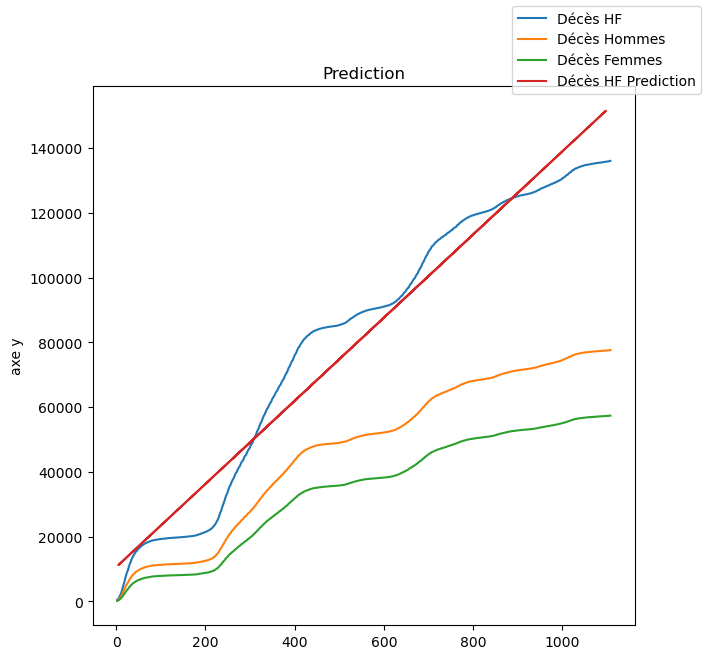

In [2]:

covid_sexe = pd.read_csv('covid_cleaned.csv')      #Afin de faciliter l'import, placer les fichiers dans le même dossier que le projet
# pd.set_option('display.max_colwidth', None)           Affichage plein écran

df = covid_sexe
# df['jour']=df['jour'][2:].apply(pd.to_datetime)

x_base = df.index
y = df.dc

x = np.expand_dims(x_base,axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

######## Tracer Décès ###############################
fig, ax = plt.subplots(nrows=1,
                            ncols=1,
                            figsize=(7, 7),
                            sharex=True)
ax.plot(df.index[2:],df.loc[2:,'dc'],label='Décès HF')
ax.set(title="HF",
        ylabel="axe y")

ax.plot(df.index[2:],df.loc[2:,'dc.1'],label='Décès Hommes')
ax.set(title="H",
        ylabel="axe y")

ax.plot(df.index[2:],df.loc[2:,'dc.2'],label='Décès Femmes')
ax.set(title="F",
        ylabel="axe y")
        
model =LinearRegression()
model.fit(x_train, y_train)

####### Prédiction ###################################
y_pred = model.predict(x_test)

ax.plot(x_test,y_pred,label='Décès HF Prediction')
ax.set(title="Prediction",
        ylabel="axe y")

fig.legend()

score = mean_squared_error(y_test, y_pred, squared=False)
print("Score =",score)


# Transformer les listes en tableaux numpy
# x_Ar = np.array(df.index[2:]).reshape(-1, 1)  # Transformer x en une matrice colonne
y_Ar = np.array(df.loc[0:,'dc'])
# print(y)

# Créer un modèle de régression linéaire
# model = LinearRegression()

# Adapter le modèle aux données
model.fit(x, y)

# Obtenir les coefficients de l'équation y = ax + b
a = model.coef_[0]  # Coefficient a (la pente)
b = model.intercept_  # Coefficient b (l'ordonnée à l'origine)

# Imprimer l'équation
print(f"Équation de régression linéaire : y = {a}x + {b}")

x_communs = a*x + b

common_points = np.intersect1d(y_pred, x_communs)
for i in common_points :
    ax.plot(x_communs,i)

print(common_points)

plt.show()